In [1]:
import math
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

#from sklearn.externals.joblib import dump
#from sklearn.externals.joblib import load
#from sklearn.feature_selection import RFE

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# Create one random seed number for reproducible results
seedNum = 888

# Libraries for neural network
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
outlier_flag = True      # Will threshold the outliers to outlier_max_value value
outlier_max_value = 9500
scale_flag = True
scale_cols=['n_tokens_title','average_token_length']

In [3]:
# Display all columns in pandas
pd.set_option('display.max_columns', None)

### Reading data

In [4]:
inputFile = '../data/output/OnlineNewsPopularity_featureEngg_RAW.csv' #Kannan stiched this file
df = read_csv(inputFile)
df.columns = df.columns.str.replace(' ','')
print(df.shape)
df.head()

(7795, 137)


,Id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Saturday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,polarity_title,subjectivity_title,polarity_content,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T0,LDA_T1,LDA_T2,LDA_T3,LDA_T4,NMF_T0,NMF_T1,NMF_T2,NMF_T3,NMF_T4,LSI_T0,LSI_T1,LSI_T2,LSI_T3,LSI_T4,LDA_C0,LDA_C1,LDA_C2,LDA_C3,LDA_C4,NMF_C0,NMF_C1,NMF_C2,NMF_C3,NMF_C4,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K1,LDA_K2,LDA_K3,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1,LSI_K2,LSI_K3,LSI_K4,shares
0,1,9,967,0.422958,0.467425,0.723716,7,6,0,0,4.172699,7,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1696,879,2224,0,0,0,0,0,0,0,0,0,1,0.000,0.00,0.013542,0.390972,13.136436,-0.564639,-0.715556,-0.365038,0.279909,-0.919380,0.012948,-0.423773,-0.529433,-0.417151,20.136116,20.801281,-8.014767,-13.831778,16.490318,-9.784305,2.202778,8.778829,7.295693,10.242371,71.769478,-0.305974,2.390489,-2.477139,0.053204,-0.480504,0.319525,0.988350,-0.227759,1.380270,37,16,5,10,9,2,7,1,1,0,0,0,0,0,0,0,0,0,0.033334,0.033334,0.866665,0.033334,0.033334,0.000000,0.000091,0.000629,0.014073,0.007567,0.007813,0.009402,0.014198,0.070256,0.018353,0.516403,0.452127,0.030462,0.000504,0.000505,0.000000,0.000000,0.717227,0.000000,0.080872,9.623199,-6.378876,-4.691144,-8.610361,1.096098,0.050542,0.422835,0.050000,0.050000,0.426623,0.174287,0.000000,0.000000,0.000245,0.00000,1.337091,-0.312889,-0.075335,0.014325,-0.025997,1100
1,2,14,290,0.606897,0.472414,0.596591,6,4,1,0,4.200000,9,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1986,575,2971,0,0,0,1,0,0,0,0,0,0,0.000,0.00,0.056136,0.518788,6.786283,0.691627,1.088876,0.853832,-0.138643,0.458027,0.407789,0.523944,0.875752,-0.142530,13.016478,-12.000452,11.389012,-6.300879,-1.136105,8.273910,-4.287179,3.648927,3.724643,2.798712,21.325382,-21.734667,-0.771340,-1.550308,1.541853,-0.771978,0.003611,-1.077202,1.362484,0.993559,1,3,0,0,2,0,15,1,0,1,0,0,0,0,0,0,0,0,0.033334,0.033334,0.866664,0.033334,0.033334,0.000000,0.261547,0.000000,0.000000,0.000000,0.201704,1.093181,-0.088887,-0.070484,-0.036985,0.001555,0.001578,0.993761,0.001550,0.001556,0.057206,0.324981,0.004723,0.000297,0.000000,4.020826,4.932893,-2.165460,-0.012635,0.367531,0.028572,0.171432,0.028572,0.742853,0.028572,0.000000,0.000000,0.141952,0.000000,0.16111,0.108035,0.157401,1.083466,-0.085400,0.860167,1100
2,3,10,392,0.591837,0.545918,0.698276,9,1,1,0,4.545918,6,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1829,1000,2456,0,1,0,0,0,0,0,0,0,0,-0.075,0.05,0.003831,0.348095,0.567927,0.097915,-0.608448,-1.120011,0.259292,1.026721,0.301655,0.340355,0.134292,0.656617,13.522844,22.819269,-3.552361,12.605568,-5.023582,-6.502191,6.504125,-0.497396,-4.285446,-5.146639,63.302799,-10.992071,-1.079108,5.448328,1.981348,-1.181570,0.729349,2.825014,0.221779,-1.192644,2,11,3,4,17,0,12,0,0,0,1,1,0,0,0,0,0,0,0.261271,0.033334,0.033334,0.033334,0.638726,0.000652,0.000000,0.003427,0.001326,0.003812,0.007069,0.002365,0.017024,0.007103,0.012383,0.330371,0.038521,0.001153,0.290487,0.339468

In [5]:
#Selected features through ensemble feature significance scoring
f_feature_ranking=open('../data/output/Feature_ranking_Selected.txt')
selected_features = f_feature_ranking.read().split('\n')
selected_features

['Id',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_world',
 'is__Monday',
 'is__Tuesday',
 'is__Wednesday',
 'is__Thursday',
 'is__Friday',
 'is__Sunday',
 'is_Weekend',
 'kw_avg_avg',
 'kw_min_avg',
 'kw_max_avg',
 'cluster_1',
 'cluster_2',
 'cluster_3',
 'cluster_4',
 'cluster_5',
 'cluster_7',
 'cluster_8',
 'subjectivity_title',
 'subjectivity_content',
 'keywords_pca_0',
 'keywords_pca_1',
 'keywords_pca_2',
 'keywords_pca_3',
 'keywords_pca_4',
 'keywords_pca_5',
 'keywords_pca_6',
 'keywords_pca_7',
 'keywords_pca_8',
 'keywords_pca_9',
 'content_pca_0',
 'content_pca_1',
 'content_pca_2',
 'content_pca_3',
 'content_pca_4',
 'content_pca_5',
 'content_pca_6',
 'content_pca_7',
 'content_pca_8',
 'content_pca_9',
 

In [6]:
df=df[selected_features]

In [7]:
# Dropping useless attributes
df.drop('Id', axis=1, inplace=True)

In [8]:
# variables for total columns, total input attributes, target column index and renaming target variable
totCol = len(df.columns)
totAttr = totCol-1
targetCol = totCol #last column
df.rename(columns={'shares': 'targetVar'}, inplace=True)

In [9]:
# Threshold the value > outlier_max_value to value outlier_max_value itself in column shares or targetVar
if outlier_flag:
    print(df[(df['targetVar'] == outlier_max_value)].shape)
    print(df[(df['targetVar'] > outlier_max_value)].shape)
    df['targetVar'] = df['targetVar'].clip(upper = outlier_max_value)
    print(df[(df['targetVar'] == outlier_max_value)].shape)
    print("shape is: ",df.shape)

(8, 107)
(384, 107)
(392, 107)
shape is:  (7795, 107)


In [10]:
#70:30 train test split
if targetCol == totCol :
    x_df = df.iloc[:,0:totAttr]
    y_df = df.iloc[:,totAttr]
else :
    x_df = df.iloc[:,1:totCol]
    y_df = df.iloc[:,0]

validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=validation_size, random_state=seedNum)
print("x_df.shape: {} y_df.shape: {}".format(x_df.shape, y_df.shape))
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

x_df.shape: (7795, 106) y_df.shape: (7795,)
x_train.shape: (5456, 106) y_train.shape: (5456,)
x_test.shape: (2339, 106) y_test.shape: (2339,)


In [11]:
# visualization configs
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

In [12]:
#kannan: This is decided from feature engineering / feature selection
lowAttributes=[]

In [13]:
# Removing the unselected attributes from the training and validation dataframes
#xy_train <- xy_train[, !(names(xy_train) %in% lowAttributes)]
#xy_test <- xy_test[, !(names(xy_test) %in% lowAttributes)]
xy_newdf = df.drop(lowAttributes, axis=1)

totCol = len(xy_newdf.columns)
totAttr = totCol-1
targetCol = totCol
#array = xy_newdf.values

if targetCol == totCol :
    #x_newdf = array[:,0:totAttr]
    #y_newdf = array[:,totAttr]
    x_newdf = xy_newdf.iloc[:,0:totAttr]
    y_newdf = xy_newdf.iloc[:,totAttr]

else :
    #x_newdf = array[:,1:totCol]
    #y_newdf = array[:,0]
    x_newdf = xy_newdf.iloc[:,1:totCol]
    y_newdf = xy_newdf.iloc[:,0]

validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_newdf, y_newdf, test_size=validation_size, random_state=seedNum)
print("x_newdf.shape: {} y_newdf.shape: {}".format(x_newdf.shape, y_newdf.shape))
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

x_newdf.shape: (7795, 106) y_newdf.shape: (7795,)
x_train.shape: (5456, 106) y_train.shape: (5456,)
x_test.shape: (2339, 106) y_test.shape: (2339,)


In [14]:
x_train.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_bus,data_channel_is_socmed,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_7,cluster_8,subjectivity_title,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T4,NMF_T2,LSI_T0,LSI_T1,LSI_T4,LDA_C0,LDA_C1,LDA_C2,NMF_C3,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K2,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1
5616,17,189,0.634921,0.455026,0.608333,4,1,0,1,3.798942,7,0,0,0,0,0,0,0,0,1,0,0,2225,2174,2288,1,0,0,0,0,0,0,0.000000,0.461524,-5.959097,-1.373338,1.683136,-1.587634,-0.186436,0.011106,0.879314,-0.486422,-0.057580,0.101777,7.575408,3.952612,1.028442,9.393019,-8.075782,-1.970480,-1.702753,-4.970053,-2.733341,3.544125,34.898693,-2.668137,-1.113329,0.123655,0.646328,-0.155151,-0.717064,-1.408446,1.277369,0.772029,0,3,1,0,6,0,2,2,0,0,1,0,0,1,0,0,0,0,0.149594,0.494078,0.247460,0.066430,-0.256524,0.138779,0.002952,0.083065,0.017079,1.433652,0.121160,0.216437,0.371639,-0.391249,0.028743,0.297804,0.314107,0.000000,0.215290,0.000000,0.172117,0.000000,0.415015,1.902894
6870,12,394,0.500000,0.538071,0.654822,2,2,0,0,4.535533,7,0,0,0,1,0,0,0,1,0,0,0,1804,1200,2224,0,0,0,0,0,0,1,0.288889,0.312681,3.925468,-0.353072,-1.069448,-0.406518,1.154451,0.090239,0.066486,0.224716,-0.114879,0.261157,20.886044,-4.035719,23.265581,-19.935139,8.024605,-5.904046,-1.555664,-1.736734,-13.224283,-2.756048,12.188890,-23.260721,-0.706181,-0.508598,0.542870,1.239769,0.652368,0.828463,0.213079,-1.159845,6,5,0,3,0,0,17,1,0,0,1,0,0,1,0,0,1,0,0.313772,0.007186,0.080662,0.060710,0.266568,0.211133,0.188000,0.598797,0.000000,6.180573,0.243764,-1.154240,-2.855461,-2.049782,0.040252,0.040000,0.040259,0.173430,0.000000,0.007428,0.000000,0.000000,1.335836,-0.306786
6352,16,322,0.524845,0.487578,0.627219,10,1,1,0,4.366460,3,0,1,0,0,0,0,0,1,0,0,0,2301,2224,2449,0,1,0,0,0,0,0,1.000000,0.645195,-6.478974,0.284282,-0.834234,-1.079925,0.324608,0.627788,0.131379,-0.254197,-0.695747,0.119709,15.609788,-10.712171,11.687694,-7.684834,-8.835175,3.988569,-7.925062,8.041782,-5.838991,-0.983151,21.526173,-20.824898,0.305956,0.718214,1.722503,1.305421,0.907354,-1.018463,-1.417109,-0.627926,0,3,3,0,2,0,15,0,0,0,0,5,0,0,0,0,0,0,0.066668,0.003570,0.020037,0.014733,0.008921,0.023493,0.018416,0.955254,0.012319,2.922663,1.395597,0.056146,-0.130541,-0.740134,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.157804,0.026843,0.043422
2223,6,1671,0.451825,0.463794,0.762914,30,29,0,0,3.968881,6,0,0,0,0,0,0,0,0,0,1,1,2371,2116,2679,0,0,0,0,0,0,0,1.000000,0.515092,-4.790280,-0.556215,-1.195813,0.130851,0.508641,0.605079,1.073307,0.027251,-0.309498,0.963911,36.797775,21.673395,-14.148977,28.781984,-14.199660,-2.696584,-5.404723,18.520157,0.640074,-17.145313,82.899734,-64.012558,-16.349106,15.653912,9.586839,-4.428814,3.772096,11.258760,-1.589514,0.245153,15,33,10,2,27,2,22,0,1,10,0,0,4,1,1,0,0,0,0.400039,0.003453,0.007025,0.001406,0.012344,0.000290,0.000290,0.000290,0.000000,11.806715,-1.226398,9.116110,8.293416,-6.939081,0.578843,0.033333,0.321157,0.003203,0.000000,0.005718,0.172623,0.007579,0.148453,0.460744
1276,15,424,0.4

In [15]:
x_test.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_bus,data_channel_is_socmed,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_7,cluster_8,subjectivity_title,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T4,NMF_T2,LSI_T0,LSI_T1,LSI_T4,LDA_C0,LDA_C1,LDA_C2,NMF_C3,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K2,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1
4410,13,270,0.577778,0.437037,0.564103,6,3,0,1,3.777778,8,0,0,0,1,0,0,1,0,0,0,0,1806,846,2255,1,0,0,0,0,0,0,0.000000,0.444156,2.371106,0.908159,-1.506181,-0.174758,0.550984,-1.243707,-0.477734,0.871323,-0.638430,-0.083196,13.088806,12.256122,2.255146,0.642883,5.468109,-6.413294,3.978298,9.780233,1.209823,-3.322369,25.099144,18.336580,1.068650,-1.330211,-0.120420,-1.199130,-1.500100,-1.607329,0.091908,-1.181179,10,2,0,0,7,1,4,0,0,0,0,2,1,0,0,0,0,0,0.299914,0.000136,0.000821,0.000951,0.002623,0.187853,0.153518,0.001973,0.007174,2.393880,-0.233783,1.497924,0.277495,0.764721,0.439899,0.440029,0.040000,0.000000,0.163459,0.000000,0.000000,0.000000,0.243160,1.078530
7387,6,1044,0.441571,0.500958,0.754881,3,3,0,0,4.227011,9,0,0,0,0,0,0,0,0,1,0,0,2211,1215,2679,0,0,0,0,0,0,1,0.300000,0.579851,-4.732383,-1.641393,0.113750,0.268086,-1.584236,-0.341706,-0.696985,-0.067413,0.836606,-0.249591,27.296144,-31.404490,29.189899,6.972684,-14.114314,6.146254,-2.617934,-11.259977,10.475517,-6.938231,38.012901,-25.951107,0.983708,-1.071599,0.956732,1.032380,0.025047,-1.249465,-1.577117,-1.521343,1,7,7,0,6,2,23,1,0,0,0,0,1,0,0,0,0,0,0.299977,0.002816,0.042594,0.133009,0.059322,0.000424,0.000422,0.998296,0.000000,12.578504,11.518285,-1.814356,1.060425,-3.489442,0.274971,0.025000,0.025000,0.000050,0.000000,0.212056,0.003071,0.008518,0.131339,0.174241
4532,10,351,0.535613,0.495726,0.654255,6,2,2,0,4.094017,10,0,0,1,0,0,0,0,1,0,0,0,2385,1008,3940,0,0,0,0,0,0,0,0.500000,0.269378,5.246181,0.609852,0.365328,-0.499658,-0.503101,-0.444127,0.291205,-0.364850,-0.598548,-0.526090,10.496860,5.190913,2.919482,-8.796712,6.250977,8.351804,9.891414,9.457913,3.421950,-13.970898,42.599194,-8.193209,-4.070135,-2.434064,-1.251123,0.180419,-1.148494,0.608276,-1.449153,-0.789655,7,12,9,2,4,0,3,0,1,1,0,2,0,0,0,2,0,0,0.066668,0.001733,0.026360,0.022389,0.021807,0.326087,0.400227,0.194155,0.000000,2.270466,-0.595358,0.152707,-1.195093,-0.335773,0.897715,0.025278,0.025387,0.177696,0.001034,0.003737,0.000000,0.000000,1.371573,-0.295893
5493,11,344,0.494186,0.424419,0.558824,4,4,1,0,4.026163,6,0,0,0,0,0,0,0,1,0,0,0,2210,2018,2349,0,0,0,0,0,0,0,0.000000,0.461640,-1.961071,-1.797345,0.081749,-0.765351,-0.216693,-0.127448,0.952723,-0.269825,1.123261,-0.148758,11.615919,9.158617,5.463990,11.570803,8.004614,-17.072777,-4.915672,0.281286,-2.412691,1.465724,-9.475216,-3.366126,0.047978,-1.171140,-0.396972,0.303006,-1.103772,0.229005,0.661609,0.658815,0,3,2,0,7,0,14,0,0,0,0,0,0,0,0,0,0,0,0.050001,0.001705,0.021980,0.002415,0.025720,0.850994,0.001614,0.001628,0.000000,3.304931,-1.934283,-0.975340,-2.025982,-0.149501,0.638891,0.040000,0.041164,0.000000,0.000000,0.000000,0.187548,0.000000,0.122388,0.511127
7563,12,665,0.511278,0.4

In [16]:
#scale_cols=['n_tokens_title','average_token_length']

In [17]:
if scale_flag:
    
    def scale_trn(df, columns):
        for col in columns:
            df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0) 
        return df

    def scale_tst(df, df_trn_tmp, columns):
        for col in columns:
            df[col] = (df[col] - df_trn_tmp[col].mean())/df_trn_tmp[col].std(ddof=0) 
        return df
    
    x_train = scale_trn(x_train.copy(), scale_cols)
    x_test  = scale_tst(x_test.copy(), x_train.copy(), scale_cols)

In [18]:
x_train.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_bus,data_channel_is_socmed,data_channel_is_world,is__Monday,is__Tuesday,is__Wednesday,is__Thursday,is__Friday,is__Sunday,is_Weekend,kw_avg_avg,kw_min_avg,kw_max_avg,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_7,cluster_8,subjectivity_title,subjectivity_content,keywords_pca_0,keywords_pca_1,keywords_pca_2,keywords_pca_3,keywords_pca_4,keywords_pca_5,keywords_pca_6,keywords_pca_7,keywords_pca_8,keywords_pca_9,content_pca_0,content_pca_1,content_pca_2,content_pca_3,content_pca_4,content_pca_5,content_pca_6,content_pca_7,content_pca_8,content_pca_9,NER_list_pca_0,NER_list_pca_1,NER_list_pca_2,NER_list_pca_3,NER_list_pca_4,NER_list_pca_5,NER_list_pca_6,NER_list_pca_7,NER_list_pca_8,NER_list_pca_9,NER_GPE,NER_DATE,NER_CARDINAL,NER_NORP,NER_PERSON,NER_TIME,NER_ORG,NER_WORK_OF_ART,NER_QUANTITY,NER_EVENT,NER_ORDINAL,NER_MONEY,NER_FAC,NER_PRODUCT,NER_LAW,NER_PERCENT,NER_LOC,NER_LANGUAGE,LDA_T4,NMF_T2,LSI_T0,LSI_T1,LSI_T4,LDA_C0,LDA_C1,LDA_C2,NMF_C3,LSI_C0,LSI_C1,LSI_C2,LSI_C3,LSI_C4,LDA_K0,LDA_K2,LDA_K4,NMF_K0,NMF_K1,NMF_K2,NMF_K3,NMF_K4,LSI_K0,LSI_K1
5616,2.176124,189,0.634921,0.455026,0.608333,4,1,0,1,-1.271306,7,0,0,0,0,0,0,0,0,1,0,0,2225,2174,2288,1,0,0,0,0,0,0,0.000000,0.461524,-5.959097,-1.373338,1.683136,-1.587634,-0.186436,0.011106,0.879314,-0.486422,-0.057580,0.101777,7.575408,3.952612,1.028442,9.393019,-8.075782,-1.970480,-1.702753,-4.970053,-2.733341,3.544125,34.898693,-2.668137,-1.113329,0.123655,0.646328,-0.155151,-0.717064,-1.408446,1.277369,0.772029,0,3,1,0,6,0,2,2,0,0,1,0,0,1,0,0,0,0,0.149594,0.494078,0.247460,0.066430,-0.256524,0.138779,0.002952,0.083065,0.017079,1.433652,0.121160,0.216437,0.371639,-0.391249,0.028743,0.297804,0.314107,0.000000,0.215290,0.000000,0.172117,0.000000,0.415015,1.902894
6870,0.353724,394,0.500000,0.538071,0.654822,2,2,0,0,1.593390,7,0,0,0,1,0,0,0,1,0,0,0,1804,1200,2224,0,0,0,0,0,0,1,0.288889,0.312681,3.925468,-0.353072,-1.069448,-0.406518,1.154451,0.090239,0.066486,0.224716,-0.114879,0.261157,20.886044,-4.035719,23.265581,-19.935139,8.024605,-5.904046,-1.555664,-1.736734,-13.224283,-2.756048,12.188890,-23.260721,-0.706181,-0.508598,0.542870,1.239769,0.652368,0.828463,0.213079,-1.159845,6,5,0,3,0,0,17,1,0,0,1,0,0,1,0,0,1,0,0.313772,0.007186,0.080662,0.060710,0.266568,0.211133,0.188000,0.598797,0.000000,6.180573,0.243764,-1.154240,-2.855461,-2.049782,0.040252,0.040000,0.040259,0.173430,0.000000,0.007428,0.000000,0.000000,1.335836,-0.306786
6352,1.811644,322,0.524845,0.487578,0.627219,10,1,1,0,0.935843,3,0,1,0,0,0,0,0,1,0,0,0,2301,2224,2449,0,1,0,0,0,0,0,1.000000,0.645195,-6.478974,0.284282,-0.834234,-1.079925,0.324608,0.627788,0.131379,-0.254197,-0.695747,0.119709,15.609788,-10.712171,11.687694,-7.684834,-8.835175,3.988569,-7.925062,8.041782,-5.838991,-0.983151,21.526173,-20.824898,0.305956,0.718214,1.722503,1.305421,0.907354,-1.018463,-1.417109,-0.627926,0,3,3,0,2,0,15,0,0,0,0,5,0,0,0,0,0,0,0.066668,0.003570,0.020037,0.014733,0.008921,0.023493,0.018416,0.955254,0.012319,2.922663,1.395597,0.056146,-0.130541,-0.740134,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.157804,0.026843,0.043422
2223,-1.833155,1671,0.451825,0.463794,0.762914,30,29,0,0,-0.610391,6,0,0,0,0,0,0,0,0,0,1,1,2371,2116,2679,0,0,0,0,0,0,0,1.000000,0.515092,-4.790280,-0.556215,-1.195813,0.130851,0.508641,0.605079,1.073307,0.027251,-0.309498,0.963911,36.797775,21.673395,-14.148977,28.781984,-14.199660,-2.696584,-5.404723,18.520157,0.640074,-17.145313,82.899734,-64.012558,-16.349106,15.653912,9.586839,-4.428814,3.772096,11.258760,-1.589514,0.245153,15,33,10,2,27,2,22,0,1,10,0,0,4,1,1,0,0,0,0.400039,0.003453,0.007025,0.001406,0.012344,0.000290,0.000290,0.000290,0.000000,11.806715,-1.226398,9.116110,8.293416,-6.939081,0.578843,0.033333,0.321157,0.003203,0.000000,0.005718,0.172623,0.007579,0.148

In [19]:
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values
    y_train = y_train.values
    print("train data change from DataFrame to Numpy ")
    
if isinstance(x_test, pd.DataFrame):
    x_test = x_test.values
    y_test = y_test.values
    print("test data change from DataFrame to Numpy ")

train data change from DataFrame to Numpy 
test data change from DataFrame to Numpy 


## Traditional ML Models Evaluation

In [20]:
# Comparing various types of regression # K-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'
#Other scoring options: https://scikit-learn.org/stable/modules/model_evaluation.html
models = []

# LINEAR ALGORITHMS
# -----------------
# Linear Regression
models.append(('LR', LinearRegression()))
# Ridge Regression
models.append(('RR', Ridge(random_state=seedNum)))
# Lasso Regression
models.append(('LASSO', Lasso(random_state=seedNum)))
#models.append(('LASSO', Lasso(alpha=4, max_iter=500, random_state=seedNum)))
# Elastic Net
#models.append(('EN', ElasticNet(alpha=4, l1_ratio=1, max_iter=500, random_state=seedNum)))
models.append(('EN', ElasticNet(random_state=seedNum)))

# NON-LINEAR ALGORITHMS
# ---------------------
# Classification and Regression Trees
models.append(('CART', DecisionTreeRegressor(random_state=seedNum)))
# K Nearest Neighbor
models.append(('KNN', KNeighborsRegressor()))
# Suppor Vector machine
models.append(('SVM', SVR()))

# ENSEMBLE ALGORITHMS
# -------------------
# Extra Trees
models.append(('ETree', ExtraTreesRegressor(random_state=seedNum)))
# Random Forest
models.append(('RF', RandomForestRegressor(random_state=seedNum)))
# Stochastic Gradient Boosting
models.append(('GBM', GradientBoostingRegressor(max_depth=3, max_features='auto', n_estimators=50,random_state=seedNum)))
# XGboost
models.append(('XGB', xgb.XGBRegressor(random_state=seedNum, booster="gbtree", n_estimators=75)))
# Adaptive Boosting
models.append(('ABM', AdaBoostRegressor(random_state=seedNum)))

results = []
names = []
metrics1= [] #RMSE_Training
metrics2= [] #RMSE_Testing

## Adding DL Model

In [21]:
def baseline_model(init_mode='uniform', neurons=5, learn_rate=0.001, momentum=0.2, act_function='relu'):
        
    model = Sequential()
    
    model.add(BatchNormalization())
    model.add(Dense(neurons, input_dim=17, kernel_initializer=init_mode, activation=act_function))
    model.add(Dense(6,  kernel_initializer=init_mode, activation=act_function))
    model.add(Dense(1,  kernel_initializer=init_mode))
    
    optimizer = tensorflow.keras.optimizers.RMSprop(lr=learn_rate, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=optimizer, )
    
    return model

estimator = KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=10, verbose=0)

In [22]:
models.append(('DL', estimator))

## Training

In [23]:
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    rmse=math.sqrt(abs(cv_results.mean()))
    metrics1.append(rmse)
    print("\n%s: rmse:%f" % (name, rmse))
    print ('Model training time:',(datetime.now() - startTimeModule))


LR: rmse:1662.094998
Model training time: 0:00:00.301983

RR: rmse:1661.000954
Model training time: 0:00:00.139088

LASSO: rmse:1658.586620
Model training time: 0:00:01.646027

EN: rmse:1653.907236
Model training time: 0:00:00.793565

CART: rmse:2253.553791
Model training time: 0:00:04.160306

KNN: rmse:1761.321697
Model training time: 0:00:01.303630

SVM: rmse:2390.800133
Model training time: 0:00:35.152739

ETree: rmse:1638.909701
Model training time: 0:01:35.176590

RF: rmse:1654.980579
Model training time: 0:05:01.341420

GBM: rmse:1614.762628
Model training time: 0:00:50.742057
[13:22:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:22:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:22:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:22:39] WARNING: src/objective/regression_obj.cu:152: reg:

## Testing

In [24]:
for name, model in models:
    model.fit(x_train, y_train)
    predictions=model.predict(x_test)
    rmse=math.sqrt(mean_squared_error(y_test, predictions))
    metrics2.append(rmse)
    print("\n%s: rmse:%f" % (name, rmse))


LR: rmse:1705.692163

RR: rmse:1699.838874

LASSO: rmse:1689.597098

EN: rmse:1658.275602

CART: rmse:2481.449454

KNN: rmse:1723.995326

SVM: rmse:2374.843036

ETree: rmse:1685.108132

RF: rmse:1726.824458

GBM: rmse:1627.960301
[13:28:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGB: rmse:1627.072248

ABM: rmse:1818.795563

DL: rmse:1725.904023


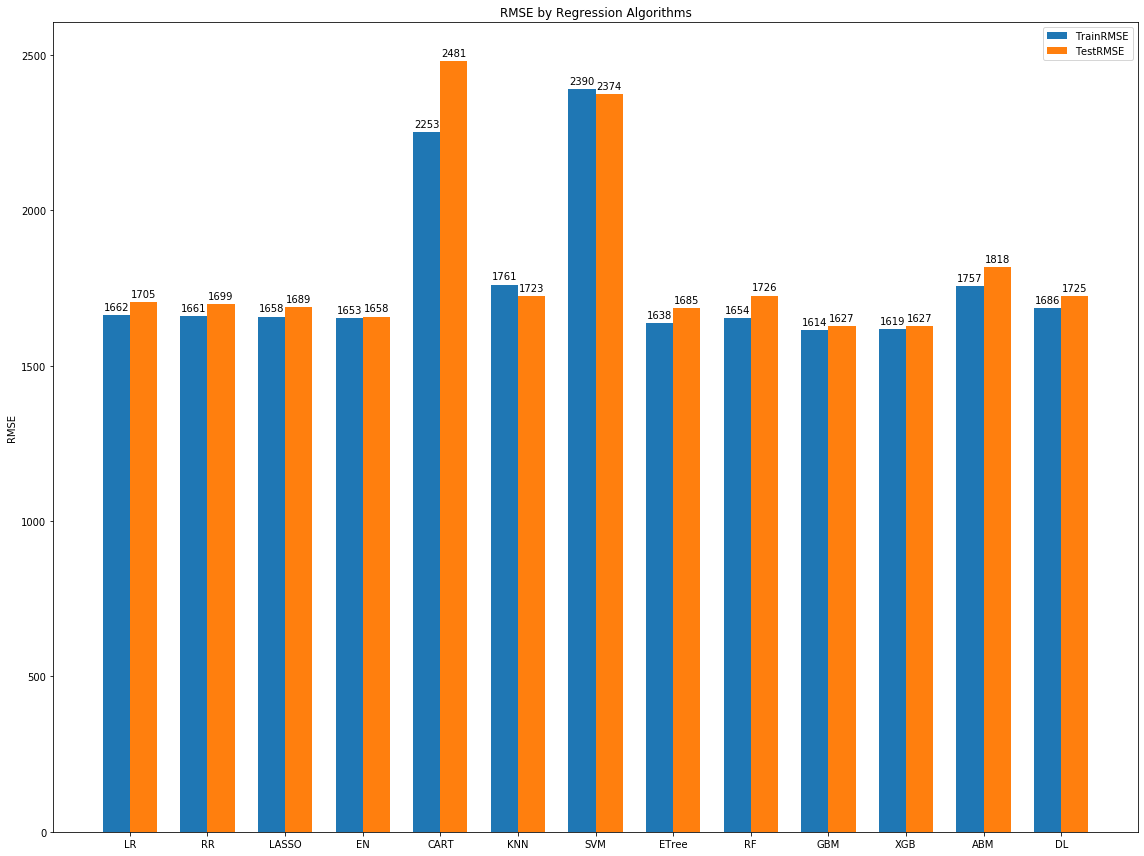

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = names

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

metrics1=[math.floor(item) for item in metrics1]
metrics2=[math.floor(item) for item in metrics2]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, metrics1, width, label='TrainRMSE')
rects2 = ax.bar(x + width/2, metrics2, width, label='TestRMSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE')
ax.set_title('RMSE by Regression Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [26]:
# Tuning algorithm #1 - ElasticNet
paramGrid1 = dict(alpha=np.array([1,2,3,4,5]),l1_ratio=np.array([0.1,0.5,1]),max_iter=np.array([500]))
model1 = ElasticNet(random_state=seedNum,normalize=False)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(x_train, y_train)

print("Best: %f using %s" % (math.sqrt(abs(grid_result1.best_score_)), grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('EN')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))
    print("%f with: %r" % (math.sqrt(abs(mean)), param))


Best: 1652.323793 using {'alpha': 5, 'l1_ratio': 0.1, 'max_iter': 500}
1653.406792 with: {'alpha': 1, 'l1_ratio': 0.1, 'max_iter': 500}
1653.907236 with: {'alpha': 1, 'l1_ratio': 0.5, 'max_iter': 500}
1658.586620 with: {'alpha': 1, 'l1_ratio': 1.0, 'max_iter': 500}
1652.922621 with: {'alpha': 2, 'l1_ratio': 0.1, 'max_iter': 500}
1653.333034 with: {'alpha': 2, 'l1_ratio': 0.5, 'max_iter': 500}
1657.218894 with: {'alpha': 2, 'l1_ratio': 1.0, 'max_iter': 500}
1652.666787 with: {'alpha': 3, 'l1_ratio': 0.1, 'max_iter': 500}
1653.059016 with: {'alpha': 3, 'l1_ratio': 0.5, 'max_iter': 500}
1656.572280 with: {'alpha': 3, 'l1_ratio': 1.0, 'max_iter': 500}
1652.480206 with: {'alpha': 4, 'l1_ratio': 0.1, 'max_iter': 500}
1652.881518 with: {'alpha': 4, 'l1_ratio': 0.5, 'max_iter': 500}
1656.164779 with: {'alpha': 4, 'l1_ratio': 1.0, 'max_iter': 500}
1652.323793 with: {'alpha': 5, 'l1_ratio': 0.1, 'max_iter': 500}
1652.736325 with: {'alpha': 5, 'l1_ratio': 0.5, 'max_iter': 500}
1655.973955 with: {

In [27]:
# Tuning algorithm #2 - Lasso
paramGrid1 = dict(alpha=np.array([1,2,3,4,5]),max_iter=np.array([500,1000,1500]))
model1 = Lasso(random_state=seedNum,normalize=False)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(x_train, y_train)

print("Best: %f using %s" % (math.sqrt(abs(grid_result1.best_score_)), grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('EN')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))
    print("%f with: %r" % (math.sqrt(abs(mean)), param))


Best: 1655.973955 using {'alpha': 5, 'max_iter': 500}
1658.586620 with: {'alpha': 1, 'max_iter': 500}
1658.586620 with: {'alpha': 1, 'max_iter': 1000}
1658.586620 with: {'alpha': 1, 'max_iter': 1500}
1657.218894 with: {'alpha': 2, 'max_iter': 500}
1657.218894 with: {'alpha': 2, 'max_iter': 1000}
1657.218894 with: {'alpha': 2, 'max_iter': 1500}
1656.572280 with: {'alpha': 3, 'max_iter': 500}
1656.572280 with: {'alpha': 3, 'max_iter': 1000}
1656.572280 with: {'alpha': 3, 'max_iter': 1500}
1656.164779 with: {'alpha': 4, 'max_iter': 500}
1656.164779 with: {'alpha': 4, 'max_iter': 1000}
1656.164779 with: {'alpha': 4, 'max_iter': 1500}
1655.973955 with: {'alpha': 5, 'max_iter': 500}
1655.973955 with: {'alpha': 5, 'max_iter': 1000}
1655.973955 with: {'alpha': 5, 'max_iter': 1500}


In [28]:
# Tuning algorithm #2 - GBM
paramGrid2 = dict(n_estimators=np.array([50,75,100,150,200]),max_depth=np.array([2,3,4,5]),max_features=np.array(['auto','sqrt','log2']))
model2 = GradientBoostingRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(x_train, y_train)

print("Best: %f using %s" % (math.sqrt(abs(grid_result2.best_score_)), grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f with: %r" % (math.sqrt(abs(mean)), param))

Best: 1614.762628 using {'max_depth': 3, 'max_features': 'auto', 'n_estimators': 50}
1616.883708 with: {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 50}
1617.896168 with: {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 75}
1619.282004 with: {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 100}
1622.907040 with: {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 150}
1627.449503 with: {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 200}
1711.605390 with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 50}
1665.703886 with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 75}
1640.745751 with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}
1635.577183 with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 150}
1635.521407 with: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 200}
1792.702457 with: {'max_depth': 2, 'max_features': 'log2', 'n_estimators': 50}
1718.233308 with: {'max_depth': 2, 'max_

In [29]:
"""
# Tuning algorithm #2 - Support Vector Machine
paramGrid2 = dict(C=np.array([0.1,1,10]),epsilon=np.array([0.01,0.1,0.5,1]),kernel=np.array(['linear', 'poly', 'rbf', 'sigmoid']))
model2 = SVR()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(x_train, y_train)

print("Best: %f using %s" % (math.sqrt(abs(grid_result2.best_score_)), grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('SVM')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
      
for mean, stdev, param in zip(means, stds, params):
    print("%f with: %r" % (math.sqrt(abs(mean)), param))
    """

'\n# Tuning algorithm #2 - Support Vector Machine\nparamGrid2 = dict(C=np.array([0.1,1,10]),epsilon=np.array([0.01,0.1,0.5,1]),kernel=np.array([\'linear\', \'poly\', \'rbf\', \'sigmoid\']))\nmodel2 = SVR()\nkfold = KFold(n_splits=num_folds, random_state=seedNum)\ngrid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)\ngrid_result2 = grid2.fit(x_train, y_train)\n\nprint("Best: %f using %s" % (math.sqrt(abs(grid_result2.best_score_)), grid_result2.best_params_))\nresults.append(grid_result2.cv_results_[\'mean_test_score\'])\nnames.append(\'SVM\')\nmeans = grid_result2.cv_results_[\'mean_test_score\']\nstds = grid_result2.cv_results_[\'std_test_score\']\nparams = grid_result2.cv_results_[\'params\']\n      \nfor mean, stdev, param in zip(means, stds, params):\n    print("%f with: %r" % (math.sqrt(abs(mean)), param))\n    '